# Assignment 1 - Module 1
### Daniel H Gonzalez
### INST414
### 02/10/2023

Write a 500-word Medium post describing an exploratory analysis of data you collected using an API of your choice. You cannot use a pre-existing or published data (Kaggle, data.world, etc.). This assignment will serve as a baseline for your work in this course, and at the end of the semester, you can review it so evaluate whether you would do things differently.

### Your post should include the following:

* Identify a non-obvious insight you want to extract from your data, describing what decision(s) this insight might inform.
* Describe the data that could answer this question, where it lives, and why it's relevant.
* Explain how you collected the data, e.g., libraries like requests, BeautifulSoup, tweepy, praw, etc. or from a data archive. 
* Perform some exploratory data analysis that helps inform the decision you posed in your introduction. 
* Describe how you cleaned up this data, common bugs you think others might encounter, and how you fixed them, etc.
* Include figures or tables summarizing your findings. 
* Conclude with a discussion of the limitations of your analysis. What’s missing? How might it be biased?
* Include a link to one of your GitHub repositories that contains the code you have developed for this assignment.

When you have written your post, publish it via Medium, add your post it to the class publication via Medium, and submit the URL to it via ELMS.

Tag your story as "inst414spr23a01"

In [2]:
# import packages
import pandas as pd
import requests
from pandas.io.json import json_normalize #special package in pandas
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Weather API call 
# source = https://open-meteo.com/
url = "https://archive-api.open-meteo.com/v1/archive"
jan23 = requests.get(url, params={'latitude':39.64,
                                     'longitude':-77.72,
                                     'start_date':'2023-01-01',
                                     'end_date':'2023-02-01',
                                     'daily':['temperature_2m_max','temperature_2m_min','temperature_2m_mean','snowfall_sum'],
                                     'timezone':"America/New_York",
                                     'temperature_unit':'fahrenheit',
                                     'windspeed_unit':'mph',
                                     'precipitation_unit':'inch'})
jan22 = requests.get(url, params={'latitude':39.64,
                                     'longitude':-77.72,
                                     'start_date':'2022-01-01',
                                     'end_date':'2022-02-01',
                                     'daily':['temperature_2m_max','temperature_2m_min','temperature_2m_mean','snowfall_sum'],
                                     'timezone':"America/New_York",
                                     'temperature_unit':'fahrenheit',
                                     'windspeed_unit':'mph',
                                     'precipitation_unit':'inch'})
jan21 = requests.get(url, params={'latitude':39.64,
                                     'longitude':-77.72,
                                     'start_date':'2021-01-01',
                                     'end_date':'2021-02-01',
                                     'daily':['temperature_2m_max','temperature_2m_min','temperature_2m_mean','snowfall_sum'],
                                     'timezone':"America/New_York",
                                     'temperature_unit':'fahrenheit',
                                     'windspeed_unit':'mph',
                                     'precipitation_unit':'inch'})
jan20 = requests.get(url, params={'latitude':39.64,
                                     'longitude':-77.72,
                                     'start_date':'2020-01-01',
                                     'end_date':'2020-02-01',
                                     'daily':['temperature_2m_max','temperature_2m_min','temperature_2m_mean','snowfall_sum'],
                                     'timezone':"America/New_York",
                                     'temperature_unit':'fahrenheit',
                                     'windspeed_unit':'mph',
                                     'precipitation_unit':'inch'})
jan19 = requests.get(url, params={'latitude':39.64,
                                     'longitude':-77.72,
                                     'start_date':'2019-01-01',
                                     'end_date':'2019-02-01',
                                     'daily':['temperature_2m_max','temperature_2m_min','temperature_2m_mean','snowfall_sum'],
                                     'timezone':"America/New_York",
                                     'temperature_unit':'fahrenheit',
                                     'windspeed_unit':'mph',
                                     'precipitation_unit':'inch'})

In [4]:
#pulling Janurary daily values
jan23 = json.loads(jan23.text)["daily"]
jan22 = json.loads(jan22.text)["daily"]
jan21 = json.loads(jan21.text)["daily"]
jan20 = json.loads(jan20.text)["daily"]
jan19 = json.loads(jan19.text)["daily"]

In [5]:
#Pulling Janurary data

#2023
max23 = jan23["temperature_2m_max"]
min23 = jan23["temperature_2m_min"]
avg23 = jan23["temperature_2m_mean"]
snow23 = jan23["snowfall_sum"]

#2022
max22 = jan22["temperature_2m_max"]
min22 = jan22["temperature_2m_min"]
avg22 = jan22["temperature_2m_mean"]
snow22 = jan22["snowfall_sum"]

#2021
max21 = jan21["temperature_2m_max"]
min21 = jan21["temperature_2m_min"]
avg21 = jan21["temperature_2m_mean"]
snow21 = jan21["snowfall_sum"]

#2020
max20 = jan20["temperature_2m_max"]
min20 = jan20["temperature_2m_min"]
avg20 = jan20["temperature_2m_mean"]
snow20 = jan20["snowfall_sum"]

#2019
max19 = jan19["temperature_2m_max"]
min19 = jan19["temperature_2m_min"]
avg19 = jan19["temperature_2m_mean"]
snow19 = jan19["snowfall_sum"]

In [6]:
#averages and sums
def average(data):
    average = sum(data)/len(data)
    return average
#2023
max23_avg = average(max23)
min23_avg = average(min23)
avg23_avg = average(avg23)
snow23_sum = sum(snow23)

#2022
max22_avg = average(max22)
min22_avg = average(min22)
avg22_avg = average(avg22)
snow22_sum = sum(snow22)

#2021
max21_avg = average(max21)
min21_avg = average(min21)
avg21_avg = average(avg21)
snow21_sum = sum(snow21)

#2020
max20_avg = average(max20)
min20_avg = average(min20)
avg20_avg = average(avg20)
snow20_sum = sum(snow20)

#2019
max19_avg = average(max19)
min19_avg = average(min19)
avg19_avg = average(avg19)
snow19_sum = sum(snow19)

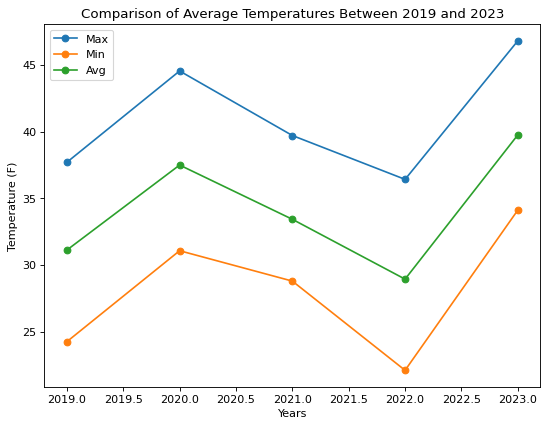

In [7]:
#plot

# create data
x = [2019, 2020,2021,2022,2023]
#max
yMax = [max19_avg, max20_avg, max21_avg, max22_avg, max23_avg]
#min
yMin = [min19_avg, min20_avg, min21_avg, min22_avg, min23_avg]
#avg
yAvg = [avg19_avg, avg20_avg, avg21_avg, avg22_avg, avg23_avg]
  
#size/config
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, yMax, label = "Max", marker='o', linestyle="-")
plt.plot(x, yMin, label = "Min", marker='o', linestyle="-")
plt.plot(x, yAvg, label = "Avg", marker='o', linestyle="-")
plt.xlabel("Years")
plt.ylabel("Temperature (F)")
plt.title("Comparison of Average Temperatures Between 2019 and 2023")
plt.legend()
plt.show()

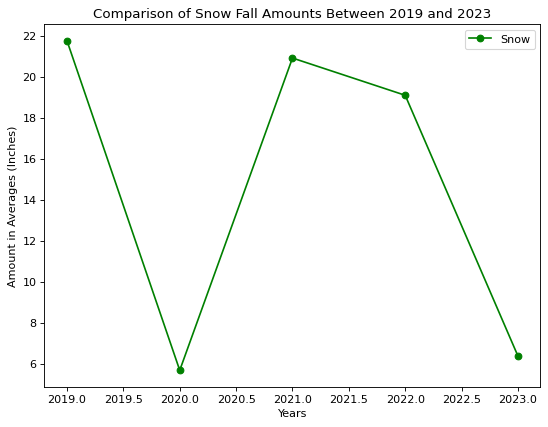

In [8]:
#Plot snow

#data
ySnow = [snow19_sum, snow20_sum, snow21_sum, snow22_sum, snow23_sum]

#size/config
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, ySnow, label = "Snow", marker='o', color = "g", linestyle="-")
plt.xlabel("Years")
plt.ylabel("Amount in Averages (Inches)")
plt.title("Comparison of Snow Fall Amounts Between 2019 and 2023")

plt.legend()
plt.show()